In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import warnings
warnings.filterwarnings("ignore")

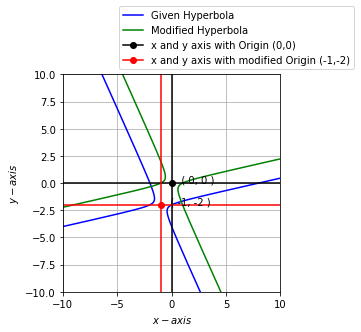

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
len = 2000
x = np.linspace(-10,10,len)

#Hyperbola parameters
# given equation values x^TVx+2u^Tx+f=0
V1 = np.array(([1,2],[2,-2]))
u1 = np.array(([5,-2]))
f1 = 0
#Reflection matrix
R1 = np.array(([0,1],[1,0]))
#Eigenvalues and eigenvectors
D_vec1,P1 = LA.eig(V1) 
D1= np.diag(D_vec1)
#Generating the positive hyperbola at the origin
y1 = np.sqrt((1-D_vec1[1]*(x**2))/D_vec1[0])

#Affine transformation parameters
c1 = -LA.inv(V1)@u1 #c=-V^(-1)u
k1 = np.sqrt(np.abs(f1 +u1@c1 ))
#Affine transform 
z1 = np.hstack((np.vstack((x,y1)),np.vstack((x,-y1))))
y_vec1 = k1*P1.T@R1@z1+c1[:,None]

#modified equation values x^TVx-1=0
#Hyperbola parameters
V2 = np.array(([1,2],[2,-2]))
u2 = np.array(([0,0]))
f2 = -1
#Reflection matrix
R2 = np.array(([0,1],[1,0]))
#Eigenvalues and eigenvectors
D_vec2,P2 = LA.eig(V2)
D2= np.diag(D_vec2)
#Generating the positive hyperbola at the origin
y2 = np.sqrt((1-D_vec2[1]*(x**2))/D_vec2[0])

#Affine transformation parameters
c2 = -LA.inv(V2)@u2 #c=-V^(-1)u
k2 = np.sqrt(np.abs(f2 +u2@c2))
#Affine transform 
z2 = np.hstack((np.vstack((x,y2)),np.vstack((x,-y2))))
y_vec2 = k2*P2.T@R2@z2+c2[:,None]

#centre and modified centre 
xc=[0,-1]
yc=[0,-2]

#Plotting

# plotting given hyperbola 

plt.plot(y_vec1[0,0:len],y_vec1[1,0:len], color='b')
plt.plot(y_vec1[0,len:2*len],y_vec1[1,len:2*len], color='b', label = 'Given Hyperbola')

# plotting modified hyperbola

plt.plot(y_vec2[0,0:len],y_vec2[1,0:len], color='g')
plt.plot(y_vec2[0,len:2*len],y_vec2[1,len:2*len], color='g', label = 'Modified Hyperbola')

plt.plot(xc[0],yc[0],marker='o',color='black',label='x and y axis with Origin (0,0)') # origin point 
plt.plot(xc[1],yc[1],marker='o',color='red',label='x and y axis with modified Origin (-1,-2)') #origin modified point


# x-y axis with origin (0,0)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#x-y axis with origin (2,-3)
plt.axhline(-2, color='red')
plt.axvline(-1, color='red')


plt.xlabel('$x-axis$');plt.ylabel('$y-axis$')

plt.xlim([-10, 10])
plt.ylim([-10,10])

#annotate centre points 
for x,y in zip(xc, yc):
    label = '   ( %d, %d )' % (x, y)
    ax.text(x, y, label)
    
plt.legend(bbox_to_anchor=(0.8, 1), loc='lower center')
plt.grid()
plt.show()